In [1]:
import pandas as pd

<b>Задание 1</b>

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [42]:
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

#создаю таблицу среднего рейтинга по id фильма
ratings_df = ratings_df.groupby('movieId')['rating'].mean().reset_index()

In [43]:
#соединяю таблицу фильмов и рейтинга
pivot_table_rating = pd.merge(movies_df, ratings_df, how='inner', on = ('movieId'))

def film_class(row):
    '''
    Присваиваю класс в зависимости от среднего рейтинга фильма
    '''
    if row['rating'] >= 4.5:
        return 'high'
    elif row['rating'] <= 2:
        return 'low'
    else:
        return 'middle'

In [44]:
pivot_table_rating['class'] = pivot_table_rating.apply(film_class, axis=1)
pivot_table_rating.head()

,movieId,title,genres,rating,class
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.872470,middle
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.401869,middle
2,3,Grumpier Old Men (1995),Comedy|Romance,3.161017,middle
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.384615,middle
4,5,Father of the Bride Part II (1995),Comedy,3.267857,middle


<b>Задание 2</b>

Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

Результат классификации запишите в отдельный столбец region.

In [46]:
keywords_df = pd.read_csv('keywords.csv')

In [47]:
def region_in_keywords(row):
    '''
    присваиваю регион в зависимости от упоминания города
    '''
    if ('москва' or 'ярославль')in row['keyword']:
        return 'Центр'
    elif ('тула')in row['keyword'].split(' '):
    ## "Тулу" искал через .split(' ') , ведь ведь в файле есть "портулак" :)) 
        return 'Центр'
    elif ('петербург' or 'псков' or 'мурманск')in row['keyword']:
        return 'Северо-Запад'
    elif ('владивосток' or 'сахалин' or 'хабаровск')in row['keyword']:
        return 'Дальний Восток'
    else:
        return 'undefined'

In [48]:
#Это решение:
keywords_df['region'] = keywords_df.apply(region_in_keywords, axis=1)
keywords_df.head()

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


In [49]:
#это решение с фильтрами по северо-западу
keywords_df[ (keywords_df['region']=='Северо-Запад') ].head()
# это решение с фильром по регионам не undefined
keywords_df_2 = keywords_df[ ~(keywords_df['region']== 'undefined') ]
keywords_df_2.head()

,keyword,shows,region
127,авито москва,979292,Центр
370,авито ру санкт петербург,425134,Северо-Запад
564,погода в санкт петербурге,292489,Северо-Запад
1063,фарпост владивосток,176951,Дальний Восток
1236,банк санкт петербург,174375,Северо-Запад


<b>Задание 3</b> (бонусное)

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл ratings.csv из базы https://grouplens.org/datasets/movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.

2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:<br>
2.1. для каждой строки пройдите по всем годам списка years<br>
2.2. если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска<br>
2.3. если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год<br>
Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’<br>

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

In [56]:
# записал нужные года в переменную "years"
years = []
x = int(1950)
while x <= 2010:
    years.append(x)
    x += 1

In [57]:
def production_year(row):
    for year in years:
        if str(year) in row['title']:
            return int(year)
    return int(1900)    

In [58]:
#в тиблицу из задания 1 добавляю столбец с годами
pivot_table_rating['year'] = pivot_table_rating.apply(production_year, axis=1)
#pivot_table_rating.head()

In [59]:
#создаю таблицу среднего рейтинга по году фильму
mean_ratings_df = pivot_table_rating.groupby('year')['rating'].mean().reset_index()

#cортирую по убыванию
mean_ratings_df.sort_values(by='rating', ascending=False).head()

,year,rating
2,1951,3.906653
3,1952,3.802318
13,1962,3.772962
4,1953,3.738878
8,1957,3.693322


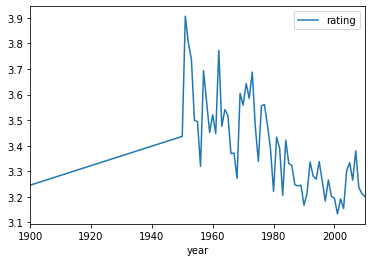

In [77]:
mean_ratings_df.plot(x='year', y='rating')